In [3]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties
import matplotlib.ticker as ticker
import json

### Plot low-res simulation

In [4]:
# read low-res simulation data
with open('normed_eval_update_lres.json', 'r') as f: # parsed_data, normed_eval
    data = json.load(f)

models = ['Bicubic', 'SRCNN_new', 'subpixelCNN_new', 'EDSR', 'WDSR', 'SwinIR']
metrics_list = ['RFNE']

lres_sim_rfne8 = []
lres_sim_ssim8 = []

for model_name in models:
    for entry in data: 
       if entry['model'] == model_name:
            if entry['dataset'] == 'cosmo_lres_sim':
                if entry['scale factor'] == '8':
                    lres_sim_rfne8.append(round(float(entry['metrics']['RFNE']['test2 error']), 2))
                    lres_sim_ssim8.append(round(float(entry['metrics'].get('SSIM', {}).get('test2 error', None)), 2))

print("RFNE 8: ", lres_sim_rfne8)
print("SSIM 8: ", lres_sim_ssim8)
cosmo_params8 = [0.0, 0.063, 0.302, 1.664, 1.377, 12.046] # Million

FileNotFoundError: [Errno 2] No such file or directory: 'normed_eval_update_lres.json'

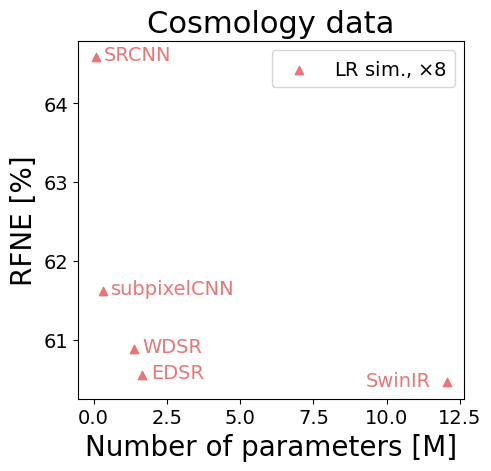

In [ ]:
# plt.rcParams["font.family"] = "san-serif"
fig = plt.figure(layout='constrained', figsize = (4.8, 4.6))

models = ['SRCNN', 'subpixelCNN', 'EDSR', 'WDSR', 'SwinIR']
cosmo_params8 = [0.063, 0.302, 1.664, 1.377, 12.046] # Million
lres_sim_rfne8 = [64.59, 61.62, 60.56, 60.88, 60.46] 
# lres_sim_rfne8 = [66.19, 62.47, 60.56, 60.88, 60.46] # 61.98185

font_size = 20
label_size = 14

red_color = '#EB7574' # '#E7524C' #'#DD2624' # '#CC8992' #'#C75A79' #'#DE2D26'
blue_color = '#1571B8'  # '#2191A8' # '#206FB0' #'#71A590' #'#458891' #'#3182BD'

# ********** rfne **********
# %---%
# nskt 16k
# %---%
a = fig.add_subplot(111)
a.scatter(cosmo_params8, lres_sim_rfne8, label=r'LR sim., $\times$8', marker='^', color=red_color)   
a.set_xlabel('Number of parameters [M]', fontsize=font_size)
a.set_ylabel('RFNE [%]', fontsize=font_size)
a.tick_params(axis='x', labelsize=label_size)
a.tick_params(axis='y', labelsize=label_size)
a.set_title('Cosmology data', fontsize=font_size+2)
plt.legend(fontsize=label_size)
# plt.yscale('log')

for i, txt in enumerate(models):
    
    if txt == 'SwinIR':
        a.annotate(txt, (cosmo_params8[i], lres_sim_rfne8[i]), xytext=(-58.0, -2.5), color=red_color, textcoords='offset points', fontsize=label_size)
        #a.annotate(txt, (nskt16_params16[i], nskt16_rfne16[i]), xytext=(-58.0, -2.5), color=blue_color, textcoords='offset points', fontsize=label_size)  
    #elif txt == 'WDSR':
    #    a.annotate(txt, (cosmo_params8[i], lres_sim_rfne8[i]), xytext=(2.0, 2.5), color=red_color, textcoords='offset points', fontsize=label_size)
        #a.annotate(txt, (nskt16_params16[i], nskt16_rfne16[i]), xytext=(6.0, 2.5), color=blue_color, textcoords='offset points', fontsize=label_size)  
    #elif txt == 'subpixelCNN':
    #    a.annotate(txt, (cosmo_params8[i], lres_sim_rfne8[i]), xytext=(4.0, 4.5), color=red_color, textcoords='offset points', fontsize=label_size)
        #a.annotate(txt, (nskt16_params16[i], nskt16_rfne16[i]), xytext=(6.0, -2.5), color=blue_color, textcoords='offset points', fontsize=label_size)  
    else:
        a.annotate(txt, (cosmo_params8[i], lres_sim_rfne8[i]), xytext=(6.0, -2.5), color=red_color, textcoords='offset points', fontsize=label_size)
        #a.annotate(txt, (nskt16_params16[i], nskt16_rfne16[i]), xytext=(6.0, -2.5), color=blue_color, textcoords='offset points', fontsize=label_size)

plt.savefig('./lres_sim_rfne.pdf')
plt.savefig('./lres_sim_rfne.png',dpi=300)
# font_size = 20
# label_size = 14

# red_color = '#EB7574' # '#E7524C' #'#DD2624' # '#CC8992' #'#C75A79' #'#DE2D26'
# blue_color = '#1571B8'  # '#2191A8' # '#206FB0' #'#71A590' #'#458891' #'#3182BD'

# # plot rfne and ssim
# fig, ax1 = plt.subplots(figsize = (6, 4.6))

# color = '#EB7574' # red
# ax1.set_xlabel('Number of parameters [M]', fontsize=font_size)
# ax1.set_ylabel('RFNE [%]', color=color, fontsize=font_size)
# ax1.tick_params(axis='x', labelsize=label_size)
# ax1.tick_params(axis='y', labelcolor=color, labelsize=label_size)
# ax1.scatter(cosmo_params8, lres_sim_rfne8, label='RFNE', color=color)  

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = '#1571B8' # blue
# ax2.set_ylabel('SSIM', color=color, fontsize=font_size)
# ax2.tick_params(axis='y', labelcolor=color, labelsize=label_size)
# ax2.scatter(cosmo_params8, lres_sim_ssim8, label='SSIM', marker='^', color=color)  
# # plt.legend()

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.title('Cosmology data (w/ LR simulation)', fontsize=font_size)

### plot physics loss

In [ ]:
with open('normed_eval_updated.json', 'r') as f: # parsed_data, normed_eval
    data = json.load(f)

models = ['Bicubic', 'SRCNN_new', 'subpixelCNN_new', 'EDSR', 'WDSR', 'SwinIR']
metrics_list = ['Physics']

nskt16_phy8, nskt16_phy16 = [], []

for model_name in models:
    for entry in data: 
       if entry['model'] == model_name:
            if entry['dataset'] == 'nskt_16k' and entry['method'] == 'bicubic':
                if entry['scale factor'] == '8':
                    nskt16_phy8.append(round(float(entry['metrics']['Physics']['test2 error']), 2))
                elif entry['scale factor'] == '16':
                    nskt16_phy16.append(round(float(entry['metrics'].get('Physics', {}).get('test2 error', None)), 2))

print("Phy error 8: ", nskt16_phy8)
print("Phy error 16: ", nskt16_phy16)

nskt16_params16 = [0.0, 0.069, 0.674, 1.813, 1.616, 12.196] # Million
nskt16_params8 = [0.0, 0.069, 0.342, 1.665, 1.404, 12.048] # Million

Phy error 8:  [1.13, 32.96, 22.63, 0.04, 0.35, 0.18]
Phy error 16:  [1.5, 60.63, 41.5, 0.06, 0.43, 0.2]


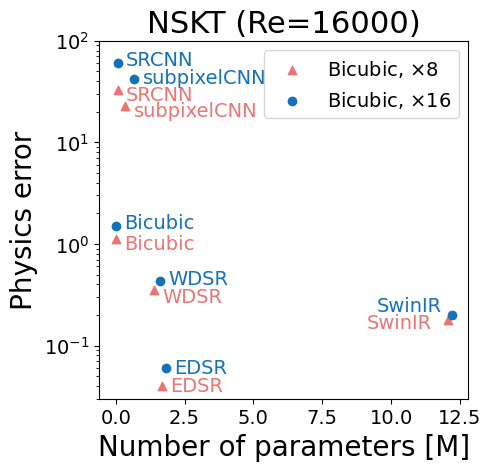

In [ ]:
models = ['Bicubic', 'SRCNN', 'subpixelCNN', 'EDSR', 'WDSR', 'SwinIR']
# ********** physics error **********
fig = plt.figure(layout='constrained', figsize = (4.8, 4.6))

font_size = 20
label_size = 14

red_color = '#EB7574' # '#E7524C' #'#DD2624' # '#CC8992' #'#C75A79' #'#DE2D26'
blue_color = '#1571B8'  # '#2191A8' # '#206FB0' #'#71A590' #'#458891' #'#3182BD'

a = fig.add_subplot(111)
a.scatter(nskt16_params8, nskt16_phy8, label=r'Bicubic, $\times$8', marker='^', color=red_color)  
a.scatter(nskt16_params16, nskt16_phy16, label=r'Bicubic, $\times$16', color=blue_color)   
a.set_xlabel('Number of parameters [M]', fontsize=font_size)
a.set_ylabel('Physics error', fontsize=font_size)
a.set_ylim(0.03, 100)
a.tick_params(axis='x', labelsize=label_size)
a.tick_params(axis='y', labelsize=label_size)
a.set_title('NSKT (Re=16000)', fontsize=font_size+2)
plt.legend(fontsize=label_size)
plt.yscale('log')

for i, txt in enumerate(models):
    if txt == 'EDSR':
        a.annotate(txt, (nskt16_params8[i], nskt16_phy8[i]), xytext=(6.0, -4.0), color=red_color, textcoords='offset points', fontsize=label_size)
        a.annotate(txt, (nskt16_params16[i], nskt16_phy16[i]), xytext=(6.0, -4.0), color=blue_color, textcoords='offset points', fontsize=label_size)
    elif txt == 'SwinIR':
        a.annotate(txt, (nskt16_params8[i], nskt16_phy8[i]), xytext=(-58.0, -6.5), color=red_color, textcoords='offset points', fontsize=label_size)
        a.annotate(txt, (nskt16_params16[i], nskt16_phy16[i]), xytext=(-54.0, 2.5), color=blue_color, textcoords='offset points', fontsize=label_size)  
    elif txt == 'WDSR':
        a.annotate(txt, (nskt16_params8[i], nskt16_phy8[i]), xytext=(6.0, -8.5), color=red_color, textcoords='offset points', fontsize=label_size)
        a.annotate(txt, (nskt16_params16[i], nskt16_phy16[i]), xytext=(6.0, -2.5), color=blue_color, textcoords='offset points', fontsize=label_size)  
    elif txt == 'subpixelCNN':
        a.annotate(txt, (nskt16_params8[i], nskt16_phy8[i]), xytext=(6.0, -7.5), color=red_color, textcoords='offset points', fontsize=label_size)
        a.annotate(txt, (nskt16_params16[i], nskt16_phy16[i]), xytext=(6.0, -2.5), color=blue_color, textcoords='offset points', fontsize=label_size)  
    else:
        a.annotate(txt, (nskt16_params8[i], nskt16_phy8[i]), xytext=(6.0, -7.5), color=red_color, textcoords='offset points', fontsize=label_size)
        a.annotate(txt, (nskt16_params16[i], nskt16_phy16[i]), xytext=(6.0, -1.5), color=blue_color, textcoords='offset points', fontsize=label_size)

plt.savefig('./bicubic_phy.pdf')
plt.savefig('./bicubic_phy.png', dpi=300)


### plotting noisy uniform scenarios

In [ ]:
datasets = ['nskt_16k', 'nskt_32k', 'era5', 'cosmo']

# read data
noisy5_rfne = []
noisy10_rfne = []
bicubic_rfne = []

for data_name in datasets:
    for entry in data: 
       if entry['dataset'] == data_name:
            if entry['model'] == 'SwinIR' and entry['method'] == 'noisy_uniform':
                if entry['scale factor'] == '8' and entry['noise ratio'] == '0.05':
                    noisy5_rfne.append(round(float(entry['metrics'].get('RFNE', {}).get('test2 error', None)), 2))
                elif entry['scale factor'] == '8' and entry['noise ratio'] == '0.1':
                    noisy10_rfne.append(round(float(entry['metrics'].get('RFNE', {}).get('test2 error', None)), 2))
            if entry['model'] == 'SwinIR' and entry['method'] == 'bicubic':
                if entry['scale factor'] == '8':
                    bicubic_rfne.append(round(float(entry['metrics'].get('RFNE', {}).get('test2 error', None)), 2))
                             

print("RFNE w/ bicubic: ", bicubic_rfne)
print("RFNE w/ 5% noise: ", noisy5_rfne)
print("RFNE w/ 10% noise: ", noisy10_rfne)

RFNE w/ bicubic:  [1.46, 2.55, 10.79, 19.32]
RFNE w/ 5% noise:  [3.64, 6.07, 11.89, 20.28]
RFNE w/ 10% noise:  [5.03, 7.35, 12.84, 21.25]


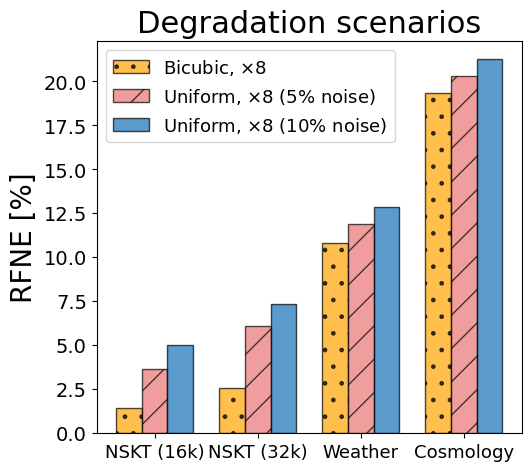

In [ ]:
data_list = ['NSKT (16k)', 'NSKT (32k)', 'Weather', 'Cosmology']

font_size = 20
label_size = 14

red_color = '#EB7574' # '#E7524C' #'#DD2624' # '#CC8992' #'#C75A79' #'#DE2D26'
blue_color = '#1571B8'  # '#2191A8' # '#206FB0' #'#71A590' #'#458891' #'#3182BD'

# setup the x-axis
x = np.arange(len(data_list))

fig = plt.figure(layout='constrained', figsize = (5.2, 4.6))
ax = fig.add_subplot(111)

bar_width = 0.25
rects0 = ax.bar(x - bar_width, bicubic_rfne, bar_width, label=r'Bicubic, $\times$8', color='orange', alpha=0.7, edgecolor='black', hatch='.')
rects1 = ax.bar(x , noisy5_rfne, bar_width, label=r'Uniform, $\times$8 (5% noise)', color=red_color, alpha=0.7, edgecolor='black', hatch='/')
rects2 = ax.bar(x + bar_width, noisy10_rfne, bar_width, label=r'Uniform, $\times$8 (10% noise)', color=blue_color, alpha=0.7, edgecolor='black')

# rects1 = ax.bar(x - width/2, noisy5_rfne, width, label='5% Noise', color=red_color, alpha=0.7, edgecolor='black', hatch='/')
# rects2 = ax.bar(x + width/2, noisy10_rfne, width, label='10% Noise', color=blue_color, alpha=0.7, edgecolor='black')

# 添加标签、标题和图例
#ax.set_xlabel('Datasets', fontsize=font_size)
ax.set_ylabel('RFNE [%]', fontsize=font_size)
ax.set_title('Degradation scenarios', fontsize=font_size+2)
ax.set_xticks(x)
ax.set_xticklabels(data_list)
ax.tick_params(axis='x', labelsize=label_size-1)
ax.tick_params(axis='y', labelsize=label_size)
ax.legend(fontsize=label_size-1)
# plt.show()

plt.savefig('./degradation.pdf')
plt.savefig('./degradation.png', dpi=300)

### Plot SSIM of weather data

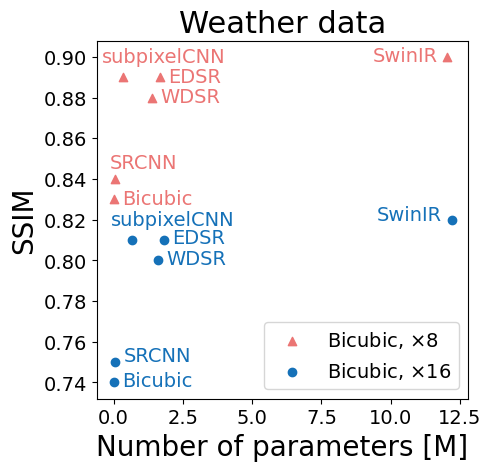

In [ ]:
with open('normed_eval_updated.json', 'r') as f: # parsed_data, normed_eval
    data = json.load(f)

models = ['Bicubic', 'SRCNN_new', 'subpixelCNN_new', 'EDSR', 'WDSR', 'SwinIR']
params16 = [0.0, 0.069, 0.674, 1.813, 1.616, 12.196] # Million
params8 = [0.0, 0.069, 0.342, 1.665, 1.404, 12.048] # Million
rfne8, inf_norm8, psnr8, ssim8 = [], [], [], []
rfne16, inf_norm16, psnr16, ssim16 = [], [], [], []
for model_name in models:
    for entry in data: 
       if entry['model'] == model_name:
            if entry['dataset'] == 'era5' and entry['method'] == 'bicubic':
                if entry['scale factor'] == '8':
                    rfne8.append(round(float(entry['metrics']['RFNE']['test2 error']), 2))
                    inf_norm8.append(round(float(entry['metrics'].get('Infinity', {}).get('test2 error', None)), 2))
                    psnr8.append(round(float(entry['metrics'].get('PSNR', {}).get('test2 error', None)), 2))
                    ssim8.append(round(float(entry['metrics'].get('SSIM', {}).get('test2 error', None)), 2))
                elif entry['scale factor'] == '16':
                    rfne16.append(round(float(entry['metrics'].get('RFNE', {}).get('test2 error', None)), 2))
                    inf_norm16.append(round(float(entry['metrics'].get('Infinity', {}).get('test2 error', None)), 2))
                    psnr16.append(round(float(entry['metrics'].get('PSNR', {}).get('test2 error', None)), 2))
                    ssim16.append(round(float(entry['metrics'].get('SSIM', {}).get('test2 error', None)), 2))

# plt.rcParams["font.family"] = "Times"
fig = plt.figure(layout='constrained', figsize = (4.8, 4.6))

font_size = 20
label_size = 14
red_color = '#EB7574' # '#E7524C' #'#DD2624' # '#CC8992' #'#C75A79' #'#DE2D26'
blue_color = '#1571B8'  # '#2191A8' # '#206FB0' #'#71A590' #'#458891' #'#3182BD'
models = ['Bicubic', 'SRCNN', 'subpixelCNN', 'EDSR', 'WDSR', 'SwinIR']

# SSIM
a = fig.add_subplot(111)
a.scatter(params8, ssim8, label=r'Bicubic, $\times$8', marker='^', color=red_color)  
a.scatter(params16, ssim16, label=r'Bicubic, $\times$16', color=blue_color)   
a.set_xlabel('Number of parameters [M]', fontsize=font_size)
a.set_ylabel('SSIM', fontsize=font_size)
#a.set_ylim(0.82,0.91)
a.tick_params(axis='x', labelsize=label_size)
a.tick_params(axis='y', labelsize=label_size)
a.set_title('Weather data', fontsize=font_size+2)
plt.legend(fontsize=label_size, loc='lower right') # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
# plt.xscale('log')

for i, txt in enumerate(models):
    if txt == 'SRCNN':
        a.annotate(txt, (params8[i], ssim8[i]), xytext=(-4.0, 8.0), color=red_color, textcoords='offset points', fontsize=label_size)
        a.annotate(txt, (params16[i], ssim16[i]), xytext=(6.0, 0.5), color=blue_color, textcoords='offset points', fontsize=label_size)
    elif txt == 'SwinIR':
        a.annotate(txt, (params8[i], ssim8[i]), xytext=(-54.0, -3.5), color=red_color, textcoords='offset points', fontsize=label_size)
        a.annotate(txt, (params16[i], ssim16[i]), xytext=(-54.0, -.5), color=blue_color, textcoords='offset points', fontsize=label_size)   
    elif txt == 'subpixelCNN':
        a.annotate(txt, (params8[i], ssim8[i]), xytext=(-15.0, 10.5), color=red_color, textcoords='offset points', fontsize=label_size)
        a.annotate(txt, (params16[i], ssim16[i]), xytext=(-15.0, 10.5), color=blue_color, textcoords='offset points', fontsize=label_size)  
    #elif txt == 'WDSR':
    #    a.annotate(txt, (params8[i], ssim8[i]), xytext=(5.0, -4.5), color=red_color, textcoords='offset points', fontsize=label_size)
        #a.annotate(txt, (params16[i], ssim16[i]), xytext=(5.0, -3.5), color=blue_color, textcoords='offset points', fontsize=label_size)       
    else:
        a.annotate(txt, (params8[i], ssim8[i]), xytext=(6.0, -3.5), color=red_color, textcoords='offset points', fontsize=label_size)
        a.annotate(txt, (params16[i], ssim16[i]), xytext=(6.0, -2.5), color=blue_color, textcoords='offset points', fontsize=label_size)

plt.savefig('./era5_ssim.pdf')
plt.savefig('./era5_ssim.png', dpi=300)


In [ ]:
print(ssim8)

[0.83, 0.83, 0.86, 0.89, 0.88, 0.9]
